# Spectral analyses

## Introductory notes:
This notebook presents spectral analyses functionality:
* Power spectral density (PSD) per sleep stage
* Spectrogram & hypnogram
* Topomaps for the spectra per sleep stage
* Spectral parametrization with FOOOF
* Additional results such as sleep statistics.

Recommended watching and reading:
1. [Mike X Cohen: Static spectral analysis](https://youtube.com/playlist?list=PLn0OLiymPak2jxGCbWrcgmXUtt9Lbjj_A)
2. [MNE: The Spectrum and EpochsSpectrum classes: frequency-domain data](https://mne.tools/stable/auto_tutorials/time-freq/10_spectrum_class.html#)
3. [FOOOF: Tutorials](https://fooof-tools.github.io/fooof/auto_tutorials/index.html)
4. [MNE: SpectrumArray class](https://mne.tools/stable/generated/mne.time_frequency.SpectrumArray.html)

## Import data

### Import module

In [1]:
from sleepeegpy.pipeline import SpectralPipe
from os import makedirs,path
import mne
mne.set_log_level('ERROR')

By default, all the input files are assumed to be saved in <b>input_files</b>, which will be created (if not already exists) in the notebook path.
Change the following string to use another path

In [2]:
output_dir  = "output_folder" # Output path and name can be changed here
input_dir = "input_files" # input files dir can be changed here
makedirs(input_dir, exist_ok=True)
makedirs(output_dir, exist_ok=True)

#### Add required files
* Put all your files in the input folder.
* Modify your eeg file name below. The file can be any format supported by the mne.read_raw() function.
* Modify your hypnogram file name (Point-per-row type of hypnogram) below.
* If needed, change Hypnogram's sampling frequency 
* For more information about the supported formats, see [mne documentation](https://mne.tools/stable/generated/mne.io.Raw.html)

In [3]:
eeg_file_name= "cleaned_raw.fif" # add your eeg_path here
hypnogram_filename = "staging.txt" # Point-per-row type of hypnogram.
hypno_freq = 1 # If required, change Hypnogram's sampling frequency (visbrain's hypnograms default to 1)

### Initialize SpectralPipe object

In [4]:
path_to_eeg = path.join(input_dir,eeg_file_name)
hypnogram_path = path.join(input_dir,hypnogram_filename)
assert path.isfile(path_to_eeg) and path.isfile(hypnogram_path), f"{path_to_eeg} or {hypnogram_path} not exist"

spectral_pipe = SpectralPipe(
    path_to_eeg=path_to_eeg,    
    output_dir=output_dir,
    path_to_hypno=hypnogram_path,
    hypno_freq=hypno_freq,  
)

Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


## Compute PSD

In [ ]:
spectral_pipe.compute_psd(
    # A dict describing stages and their indices in the hypnogram file.
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    # Rereferencing to apply. Can be list of str channels or "average".
    # If None, will not change the reference.
    reference="average",
    fmin=0,  # Lower frequency bound.
    fmax=60,  # Upper frequency bound.
    picks="eeg",  # Channels to compute the PSD for.
    reject_by_annotation=True,  # Whether to reject epochs annotated as BAD.
    save=True,  # Whether to save the PSD hdf5 file for each sleep stage.
    overwrite=True,  # Whether to overwrite hdf5 files if there are any.
    # Additional arguments passed to the PSD computing method, i.e., welch or multitaper:
    n_fft=1024,
    n_per_seg=1024,
    n_overlap=512,
    window="hamming",
    n_jobs=-1, 
    verbose=False, 
)

In [ ]:
spectral_pipe.psds["REM"].get_data()

array([[1.20544608e-10, 9.13856487e-10, 4.32137885e-10, ...,
        2.00851069e-14, 2.02085506e-14, 1.96803265e-14],
       [9.16359851e-11, 6.92785547e-10, 3.43649234e-10, ...,
        1.07580601e-14, 1.03970152e-14, 1.02861636e-14],
       [4.65226376e-11, 3.45777189e-10, 1.85735238e-10, ...,
        1.18917446e-14, 1.20680226e-14, 1.20086151e-14],
       ...,
       [2.18358859e-11, 1.40802821e-10, 8.09673291e-11, ...,
        1.62120327e-14, 1.51799036e-14, 1.53065000e-14],
       [9.57268940e-12, 6.17214444e-11, 3.82661443e-11, ...,
        1.17953057e-14, 1.11716153e-14, 1.09855943e-14],
       [1.02225625e-11, 6.66994068e-11, 5.10107331e-11, ...,
        3.09470840e-14, 3.19075520e-14, 3.06672304e-14]])

In [ ]:
spectral_pipe.psds["REM"].to_data_frame()

freq            E1            E2            E3            E4  \
0     0.000000  1.205446e-10  9.163599e-11  4.652264e-11  2.361730e-11   
1     0.244141  9.138565e-10  6.927855e-10  3.457772e-10  1.662492e-10   
2     0.488281  4.321379e-10  3.436492e-10  1.857352e-10  1.034098e-10   
3     0.732422  1.305058e-10  1.122229e-10  6.907628e-11  4.777266e-11   
4     0.976562  5.479270e-11  4.879642e-11  3.398966e-11  2.742932e-11   
..         ...           ...           ...           ...           ...   
241  58.837891  2.052002e-14  1.080107e-14  1.185645e-14  9.236874e-15   
242  59.082031  2.008716e-14  1.057612e-14  1.171000e-14  9.409765e-15   
243  59.326172  2.008511e-14  1.075806e-14  1.189174e-14  9.523270e-15   
244  59.570312  2.020855e-14  1.039702e-14  1.206802e-14  9.175959e-15   
245  59.814453  1.968033e-14  1.028616e-14  1.200862e-14  9.139879e-15   

               E5            E6            E7            E8            E9  \
0    1.874374e-11  1.450813e-11  2.218452e-11  1.122231e-11  9.538333e-12   
1    1.119225e-10  8.076044e-11  9.857186e-11  6.725583e-11  5.687559e-11   
2    7.332040e-11  5.620539e-11  5.915940e-11  5.096347e-11  4.554884e-11   
3    3.865387e-11  3.290459e-11  3.159175e-11  3.215459e-11  2.766479e-11   
4    2.447354e-11  2.202644e-11  2.154214e-11  2.232954e-11  1.853072e-11   
..            ...           ...           ...           ...           ...   
241  9.386774e-15  9.163107e-15  1.086743e-14  1.460974e-14  1.055531e-14   
242  8.857569e-15  9.199416e-15  1.060803e-14  1.466554e-14  9.855808e-15   
243  8.751198e-15  9.190660e-15  1.006159e-14  1.388243e-14  9.746180e-15   
244  8.892312e-15  8.748358e-15  1.008715e-14  1.370326e-14  9.504832e-15   
245  8.727308e-15  8.709531e-15  1.034216e-14  1.343112e-14  9.215188e-15   

     ...          E248          E249          E250          E251  \
0    ...  1.817369e-10  6.496992e-11  2.793785e-11  2.312580e-11   
1    ...  1.323533e-09  4.610354e-10  1.892631e-10  1.584058e-10   
2    ...  6.524901e-10  2.370033e-10  1.048493e-10  8.556182e-11   
3    ...  2.076041e-10  8.276927e-11  4.225638e-11  3.487731e-11   
4    ...  8.822444e-11  3.922727e-11  2.295007e-11  2.046545e-11   
..   ...           ...           ...           ...           ...   
241  ...  2.084268e-14  2.363470e-14  1.887338e-14  2.243271e-14   
242  ...  2.169877e-14  2.232925e-14  1.901087e-14  2.242874e-14   
243  ...  2.054704e-14  2.285352e-14  1.953269e-14  2.312350e-14   
244  ...  2.022414e-14  2.315599e-14  1.872794e-14  2.186576e-14   
245  ...  2.012729e-14  2.342522e-14  1.859850e-14  2.136766e-14   

             E252          E253          E254          E255          E256  \
0    2.281494e-10  6.776294e-11  4.518227e-11  2.183589e-11  9.572689e-12   
1    1.669154e-09  5.028152e-10  3.291209e-10  1.408028e-10  6.172144e-11   
2    8.178159e-10  2.516436e-10  1.669304e-10  8.096733e-11  3.826614e-11   
3    2.510315e-10  8.321513e-11  6.082972e-11  3.462790e-11  1.804304e-11   
4    1.020850e-10  3.707458e-11  2.900152e-11  1.940715e-11  1.125545e-11   
..            ...           ...           ...           ...           ...   
241  1.669183e-14  1.151799e-14  1.420598e-14  1.654172e-14  1.119376e-14   
242  1.711121e-14  1.185718e-14  1.410618e-14  1.592892e-14  1.118600e-14   
243  1.555995e-14  1.160546e-14  1.403677e-14  1.621203e-14  1.179531e-14   
244  1.540562e-14  1.114618e-14  1.346594e-14  1.517990e-14  1.117162e-14   
245  1.595666e-14  1.116042e-14  1.342614e-14  1.530650e-14  1.098559e-14   

             VREF  
0    1.022256e-11  
1    6.669941e-11  
2    5.101073e-11  
3    3.009207e-11  
4    1.945493e-11  
..            ...  
241  3.135501e-14  
242  2.988033e-14  
243  3.094708e-14  
244  3.190755e-14  
245  3.066723e-14  

[246 rows x 258 columns]

## Visualize

### PSD

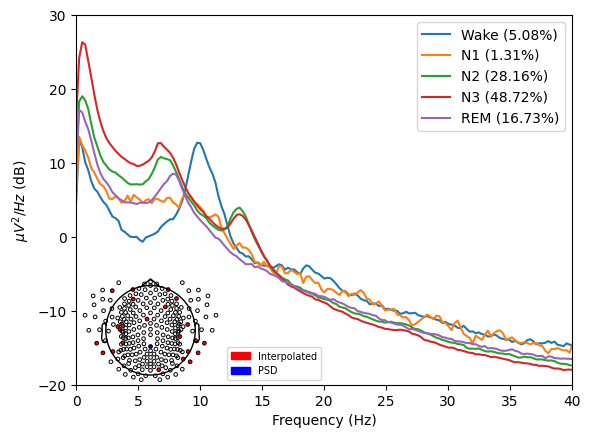

In [ ]:
spectral_pipe.plot_psds(
    picks=["E101"],
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    dB=True,
    xscale="linear",  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    axis=None,
    plot_sensors=True,  # Whether to plot EEG sensors showing which channels were used to compute PSD.
    save=True,  # Whether to save the plot as a png file.
)

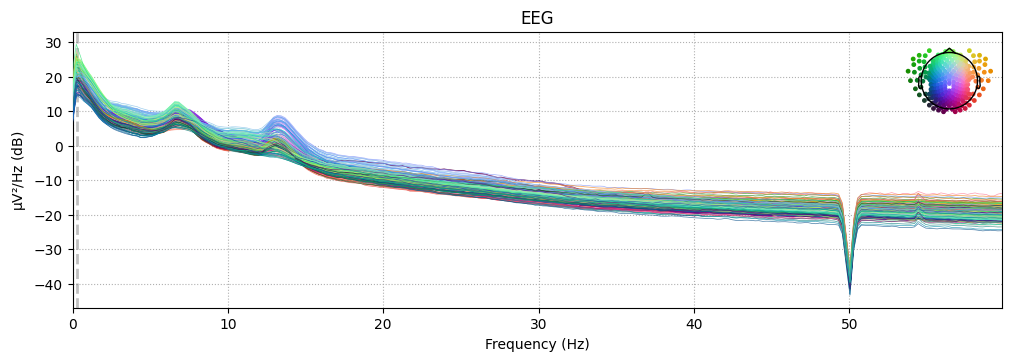

In [ ]:
_ = spectral_pipe.psds["N2"].plot(picks="data", exclude="bads", show=False)

### Hypnogram & spectrogram

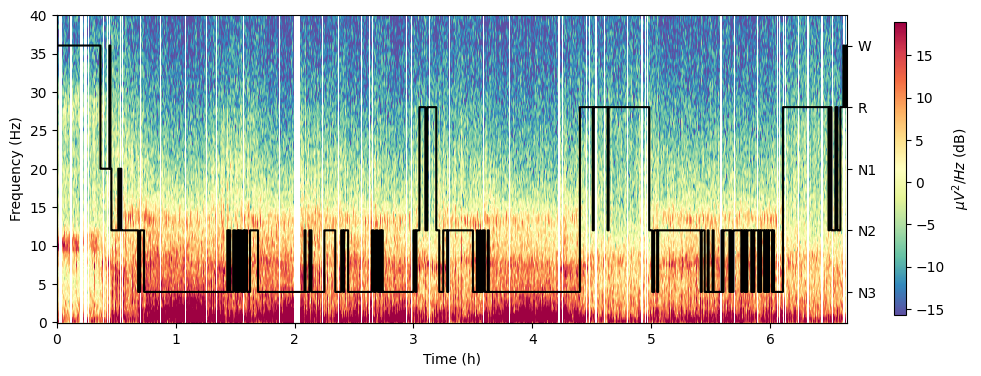

In [ ]:
spectral_pipe.plot_hypnospectrogram(
    picks=["E101"],  # Channel[s] to compute the spectrogram on.
    win_sec=10,  # The length of the sliding window, in seconds, used for multitaper PSD computation.
    freq_range=(0, 40),  # Y axis limits
    cmap="Spectral_r",  # Matplotlib colormap as in https://matplotlib.org/stable/tutorials/colors/colormaps.html
    overlap=True,  # Whether to plot hypnogram over spectrogram (True) or on top of it (False)
    save=True,  # Whether to save the plot as a file.
)

### Topomap

Plots a topomap for a single sleep stage and frequency band

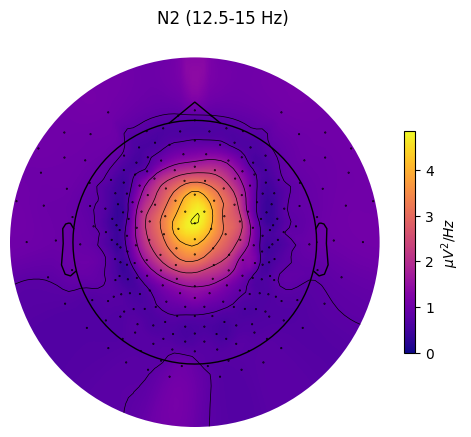

In [ ]:
spectral_pipe.plot_topomap(
    stage="N2",  # Stage to plot topomap for.
    band={"SMR": (12.5, 15)},  # Band to plot topomap for.
    # Should contain at least index of the provided "stage".
    dB=False,  # Whether to transform PSD to dB/Hz
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

### Topomap collage
Plot topomaps for multiple bands and sleep stages

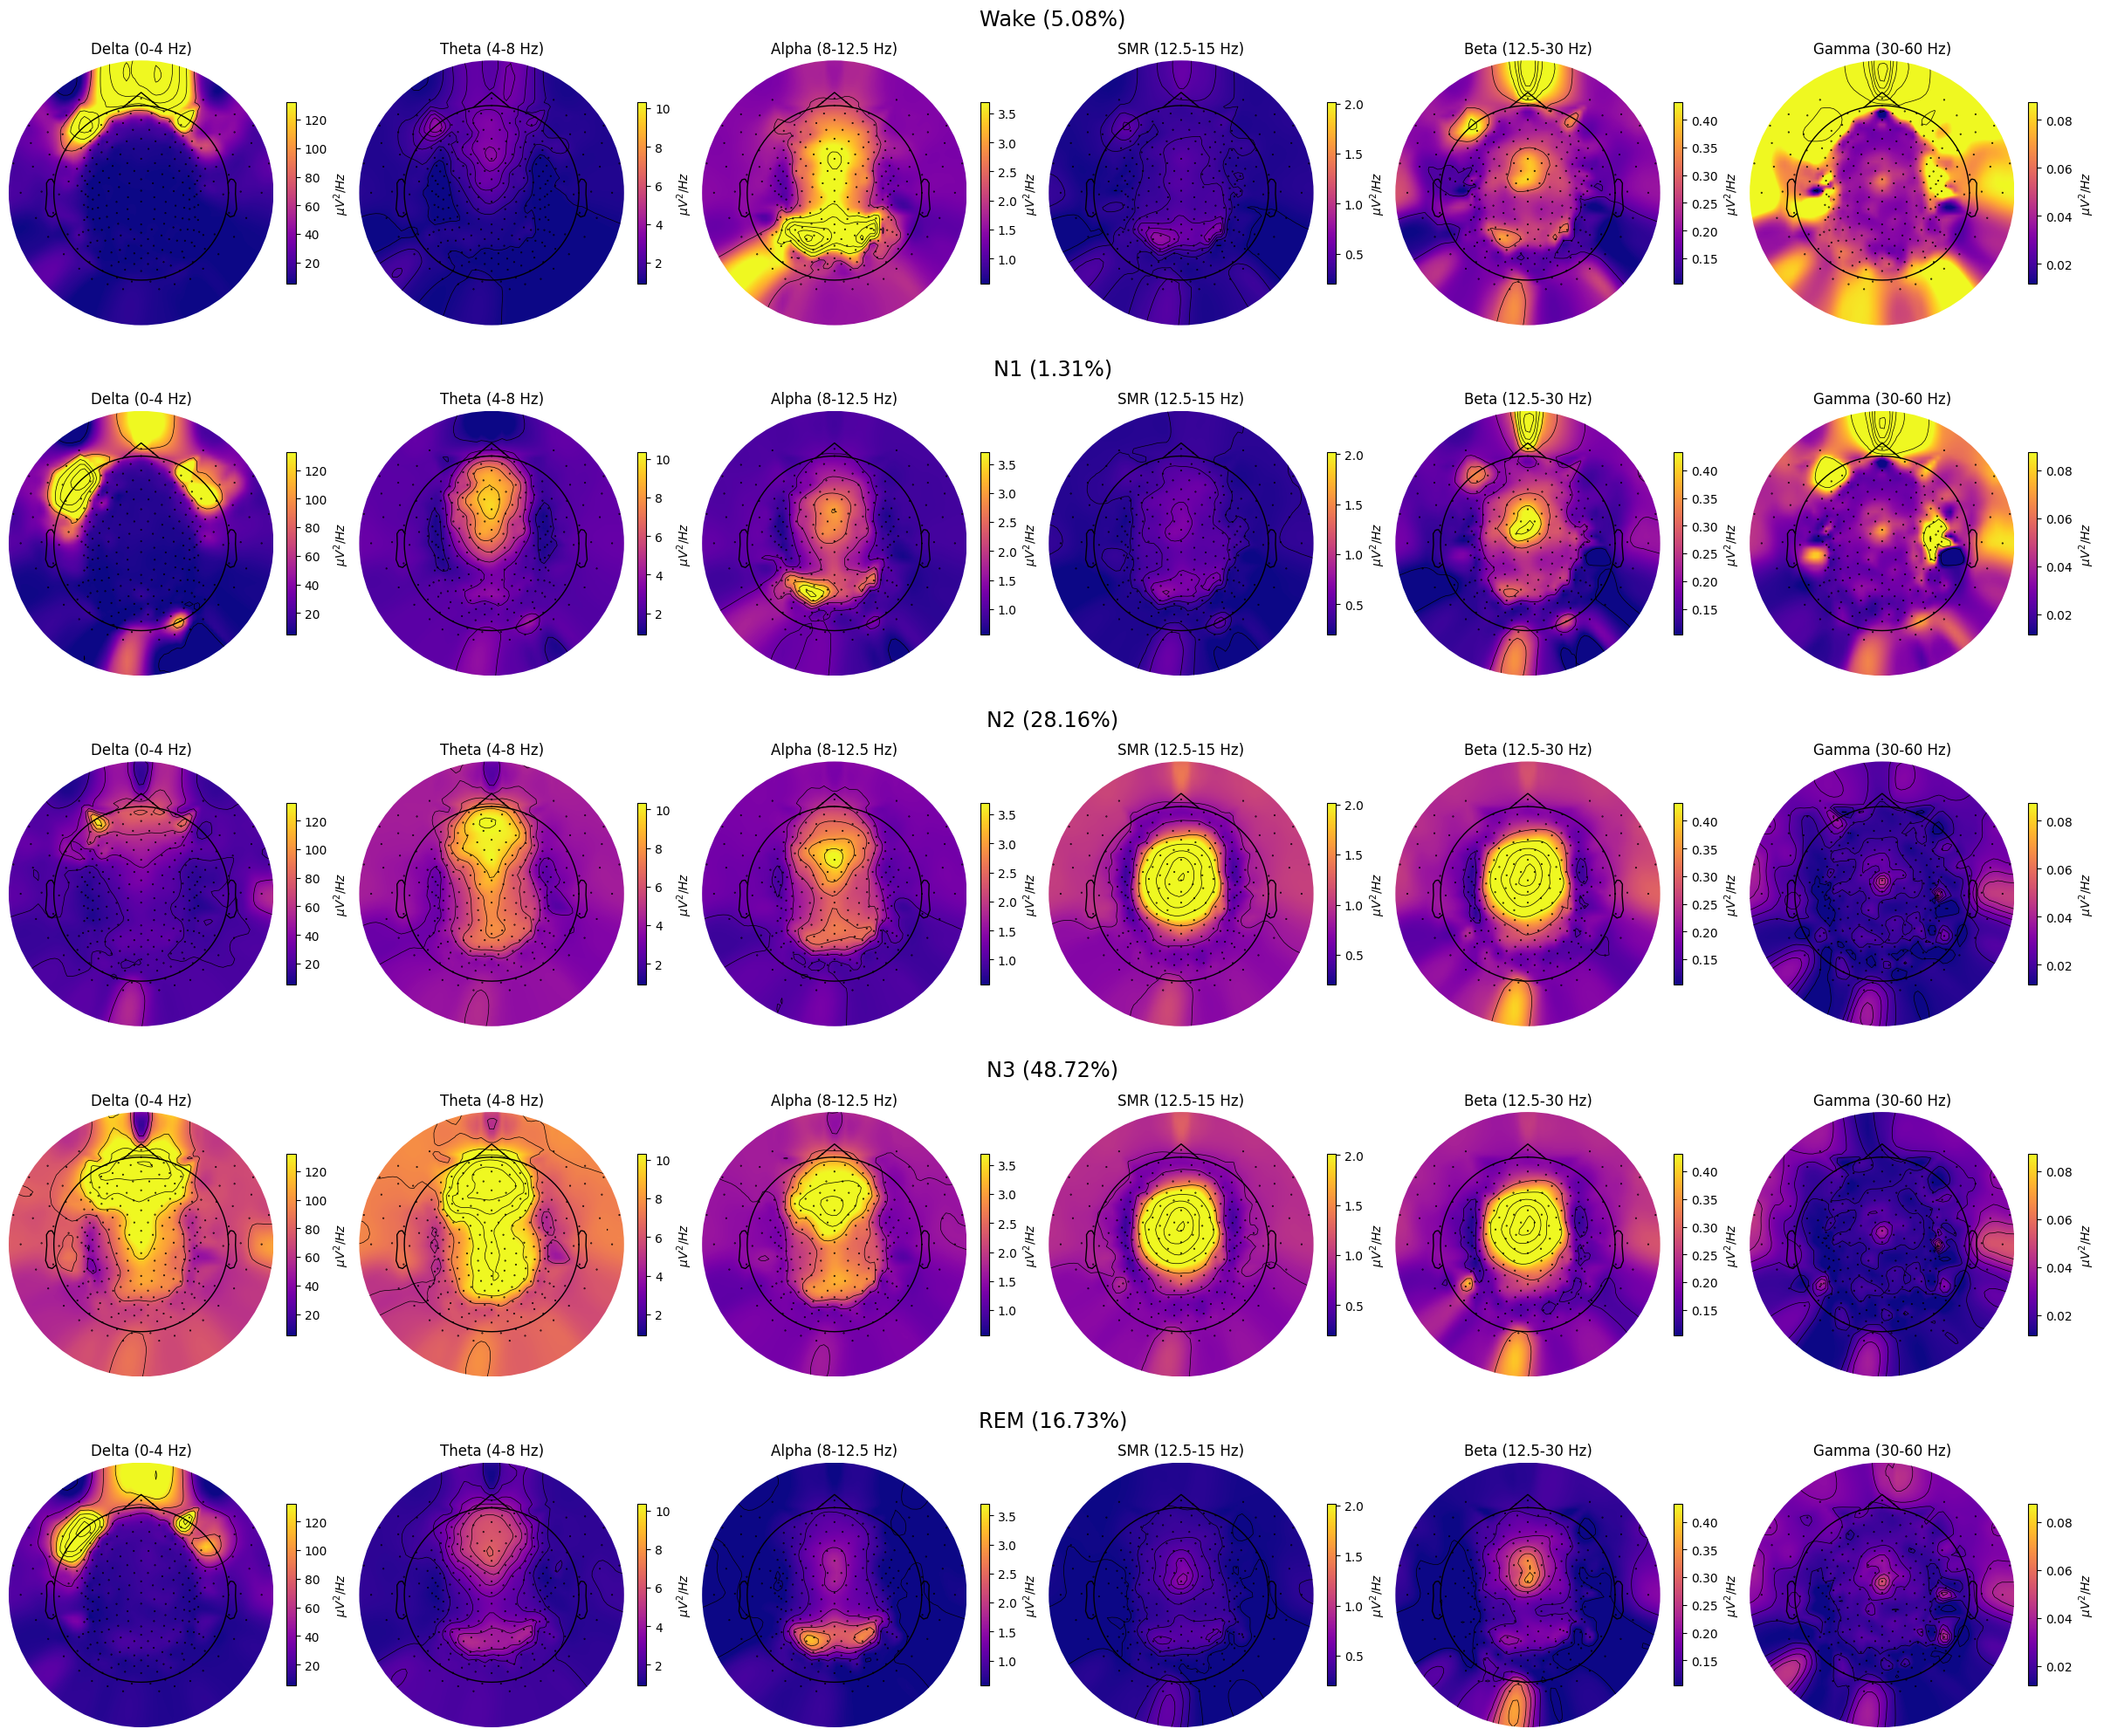

In [15]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 4), 'Theta': (4, 8),
            'Alpha': (8, 12.5), 'SMR': (12.5, 15), 
            'Beta': (12.5, 30), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    dB=False,  # Whether to transform PSD to dB/Hz.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    fig=None,  # Instance of plt.Figure, a new fig will be created if None.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap='plasma'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

## Parametrize spectrum

In [ ]:
spectral_pipe.parametrize(
    picks=['eeg'],  # Channels to use.
    freq_range=[0.5, 60],  # Range of frequencies to parametrize.
    # Whether to average psds over channels.
    # If False or multiple channels are provided, the FOOOFGroup will be used.
    # Defaults to False.
    average_ch=False
    )

Running FOOOFGroup across 257 power spectra.
                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                            Number of power spectra in the Group: 257                             
                                                                                                  
                        The model was run on the frequency range 0 - 60 Hz                        
                                 Frequency Resolution is 0.24 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                

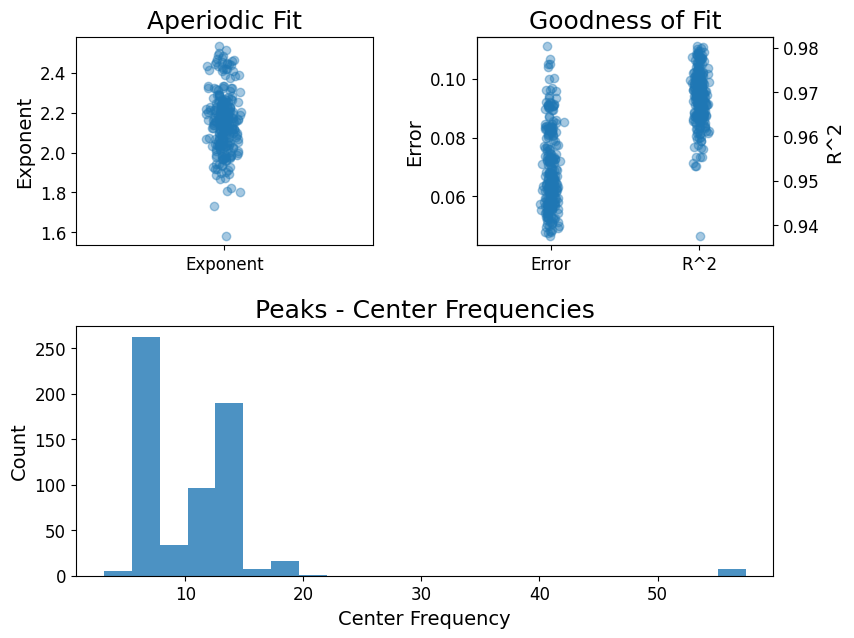

In [ ]:
spectral_pipe.fooofs['N2'].report()

## Sleep Stats

In [ ]:
spectral_pipe.sleep_stats(save=False)

{'TIB': 399.0405333333333,
 'SPT': 376.5,
 'WASO': 1.0,
 'TST': 375.5,
 'N1': 6.0,
 'N2': 109.5,
 'N3': 191.0,
 'REM': 69.0,
 'NREM': 306.5,
 'SOL': 22.0,
 'Lat_N1': 22.0,
 'Lat_N2': 27.5,
 'Lat_N3': 41.0,
 'Lat_REM': 183.0,
 '%N1': 1.5978695073235685,
 '%N2': 29.161118508655125,
 '%N3': 50.865512649800266,
 '%REM': 18.37549933422104,
 '%NREM': 81.62450066577897,
 'SE': 94.10071625138166,
 'SME': 99.734395750332}